In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Globals
ORANGE = '#F2BE4A'
RED = '#ef4123'
GRAY = '#545453'

## Logistic Regression

### Prepare the data for Logistic Regression

In [2]:
data = pd.read_csv('./data/penguins_size.csv')
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
data = data.drop(['sex', 'island', 'flipper_length_mm', 'body_mass_g'], axis=1)
data = data[data['species'] != 'Chinstrap']

data['culmen_length_mm'].fillna((data['culmen_length_mm'].mean()), inplace=True)
data['culmen_depth_mm'].fillna((data['culmen_depth_mm'].mean()), inplace=True)

In [4]:
X = data.drop(['species'], axis=1)
X = X.values

ss = StandardScaler()
X = ss.fit_transform(X)

In [5]:
y = data['species']
spicies = {'Adelie': 0, 'Gentoo': 1}
y = [spicies[item] for item in y]
y = np.array(y) 

In [6]:
# Remove sample that is too close
X = np.delete(X, 182, axis=0)
y = np.delete(y, 182, axis=0)

In [7]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

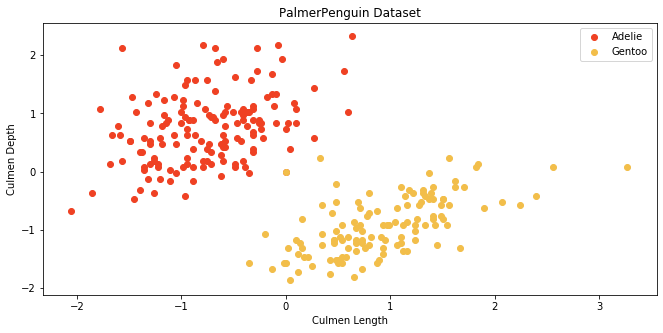

In [8]:
plt.figure(figsize=(11, 5))
plt.title("PalmerPenguin Dataset")
plt.xlabel('Culmen Length')
plt.ylabel('Culmen Depth')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color=RED, label='Adelie')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color=ORANGE, label='Gentoo')
plt.legend();

### Python Implementation

In [9]:
class MyLogisticRegression():
    '''Implements algorithm for Logistic Regression'''
    def __init__(self, learning_rate=0.1):
        self.learning_rate=learning_rate
    
    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def __loss(self, p, y):
        return (-y * np.log(p) - (1 - y) * np.log(1 - p)).mean()
    
    def __extend_input(self, X):
        ones = np.ones((X.shape[0], 1))
        return np.concatenate((ones, X), axis=1)
    
    def __gradient(self, X, p, y):
        return np.dot(X.T, (p - y)) / y.size
    
    def fit(self, X, y, epochs):
        X = self.__extend_input(X)
        
        self.theta = np.zeros(X.shape[1])
        
        for i in range(epochs):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            
            loss = self.__loss(h, y)

            if(i % 10000 == 0):
                print(f'Epoch {i} - Loss: {loss} \t') 
                
            self.theta -= self.learning_rate * self.__gradient(X, h, y)

    def predict(self, X):
        X = self.__extend_input(X)
        probability = self.__sigmoid(np.dot(X, self.theta))
        
        return probability.round()

In [10]:
model = MyLogisticRegression()
model.fit(X_train, y_train, 100000)

Epoch 0 - Loss: 0.6931471805599454 	
Epoch 10000 - Loss: 0.012819764501272977 	
Epoch 20000 - Loss: 0.011013027144578994 	
Epoch 30000 - Loss: 0.010181650331194806 	
Epoch 40000 - Loss: 0.009671604050048055 	
Epoch 50000 - Loss: 0.009316287125129196 	
Epoch 60000 - Loss: 0.009050017828631182 	
Epoch 70000 - Loss: 0.008840685865181042 	
Epoch 80000 - Loss: 0.008670404338155711 	
Epoch 90000 - Loss: 0.008528290332982103 	


In [11]:
predictions = model.predict(X_test)
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        29

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55



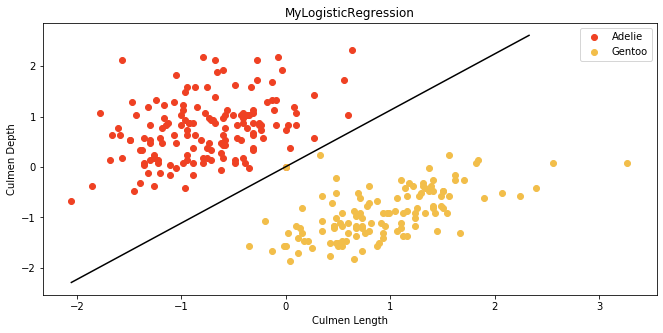

In [12]:
plt.figure(figsize=(11, 5))

plt.title("MyLogisticRegression")
plt.xlabel('Culmen Length')
plt.ylabel('Culmen Depth')

plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color=RED, label='Adelie')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color=ORANGE, label='Gentoo')
plt.legend()


x_values = [np.min(X[:, 0]), np.max(X[:, 1])]
y_values = - (model.theta[0] + np.dot(model.theta[1], x_values)) / model.theta[2]

plt.plot(x_values, y_values, color='black');

### Using SciKit Learn

In [13]:
model = LogisticRegression(C=1e20)
model.fit(X_train, y_train)

preditions = model.predict(X_test)
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        29

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55



## K-Nearest Neighbour

### Prepare the data for K-Nearest Neighbour

In [14]:
data = pd.read_csv('./data/penguins_size.csv')
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [15]:
data = pd.read_csv('./data/penguins_size.csv')
data = data.drop(['sex', 'island', 'flipper_length_mm', 'body_mass_g'], axis=1)

data['culmen_length_mm'].fillna((data['culmen_length_mm'].mean()), inplace=True)
data['culmen_depth_mm'].fillna((data['culmen_depth_mm'].mean()), inplace=True)

ss = StandardScaler()

# Prepare input
X = data.drop(['species'], axis=1)
X = X.values
X = ss.fit_transform(X)

# Prepare target
y = data['species']
spicies = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}

y = [spicies[item] for item in y]
y = np.array(y) 

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

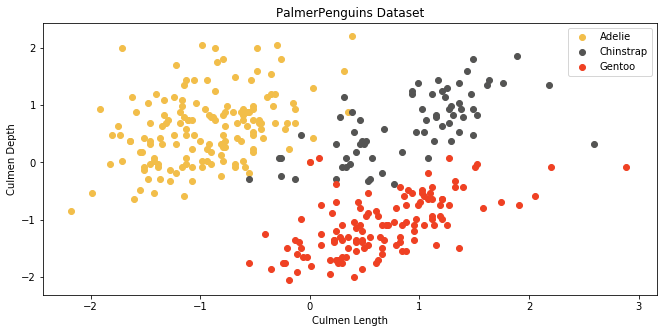

In [16]:
plt.figure(figsize=(11, 5))

plt.title("PalmerPenguins Dataset")
plt.xlabel('Culmen Length')
plt.ylabel('Culmen Depth')

plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color=ORANGE, label='Adelie')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color=GRAY, label='Chinstrap')
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], color=RED, label='Gentoo')

plt.legend();

### Python Implementation

In [17]:
class MyKNearestNeighbors():
    '''Implements algorithm for K-Nearest Neighbors'''
    def __init__(self, num_neighbors=5, num_clasess=3):
        self.num_neighbors = num_neighbors
        self.num_clasess = num_clasess

    def __euclidian_distance(self, a, b):
        return np.sqrt(np.sum((a - b)**2, axis=1))

    def __get_neighbours(self, X_test, return_distance=False):
        neighbours = []

        test_train_distances = [self.__euclidian_distance(x_test, self.X_train) for x_test in X_test]

        for row in test_train_distances:
            enumerated_neighbours = enumerate(row)
            sorted_neighbours = sorted(enumerated_neighbours, key=lambda x: x[1])[:self.num_neighbors]

            index_list = [tup[0] for tup in sorted_neighbours]

            neighbours.append(index_list)
      
        return np.array(neighbours)
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        neighbors = self.__get_neighbours(X_test)
        preditions = np.array([
            np.argmax(np.bincount(self.y_train[neighbor]))
            for neighbor in neighbors
        ])

        return preditions

In [18]:
model = MyKNearestNeighbors()
model.fit(X_train, y_train)

In [19]:
my_knn_predictions = model.predict(X_test)
print(metrics.classification_report(y_test, my_knn_predictions))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.83      1.00      0.91        10
           2       1.00      0.97      0.99        34

    accuracy                           0.97        69
   macro avg       0.94      0.98      0.96        69
weighted avg       0.98      0.97      0.97        69



In [20]:
pd.DataFrame({
    'Actual Value': y_test,
    'KNN Predictions': my_knn_predictions,
})

,Actual Value,KNN Predictions
0,0,0
1,2,2
2,0,0
3,2,2
4,2,2
...,...,...
64,0,0
65,2,2
66,2,2
67,1,1


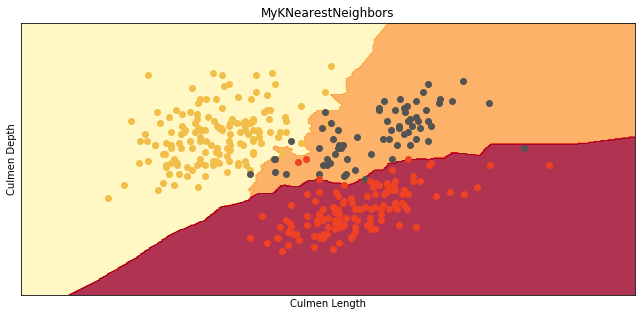

In [21]:
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

plt.figure(figsize=(11, 5))

predictions = model.predict(np.c_[xx.ravel(), yy.ravel()])

predictions = predictions.reshape(xx.shape)
plt.contourf(xx, yy, predictions, cmap='YlOrRd', alpha=0.8)

plt.title("MyKNearestNeighbors")
plt.xlabel('Culmen Length')
plt.ylabel('Culmen Depth')

plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color=ORANGE, label='Adelie')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color=GRAY, label='Chinstrap')
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], color=RED, label='Gentoo')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Using SkLearn

In [22]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.9710144927536232


In [24]:
sk_knn_predictions = model.predict(X_test)

print(metrics.classification_report(y_test, sk_knn_predictions))

pd.DataFrame({
    'Actual Value': y_test,
    'KNN Predictions': my_knn_predictions,
    'SciKit Learn KNN': sk_knn_predictions,
})

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.83      1.00      0.91        10
           2       1.00      0.97      0.99        34

    accuracy                           0.97        69
   macro avg       0.94      0.98      0.96        69
weighted avg       0.98      0.97      0.97        69



,Actual Value,KNN Predictions,SciKit Learn KNN
0,0,0,0
1,2,2,2
2,0,0,0
3,2,2,2
4,2,2,2
...,...,...,...
64,0,0,0
65,2,2,2
66,2,2,2
67,1,1,1


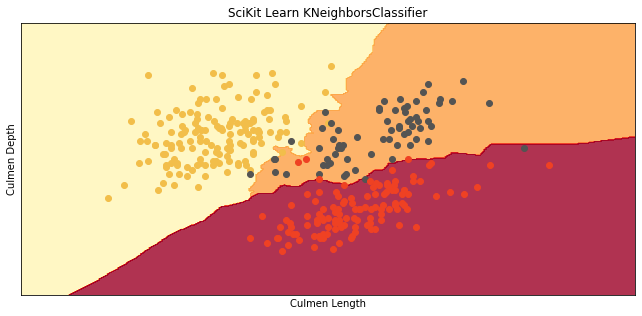

In [25]:
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

plt.figure(figsize=(11, 5))

predictions = model.predict(np.c_[xx.ravel(), yy.ravel()])

predictions = predictions.reshape(xx.shape)
plt.contourf(xx, yy, predictions, cmap='YlOrRd', alpha=0.8)

plt.title("SciKit Learn KNeighborsClassifier")
plt.xlabel('Culmen Length')
plt.ylabel('Culmen Depth')

plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color=ORANGE, label='Adelie')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color=GRAY, label='Chinstrap')
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], color=RED, label='Gentoo')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

## Naive Bias

### Prepare the data for Naive Bias

In [26]:
data = pd.read_csv('./data/penguins_size.csv')
data = data.drop(['sex', 'island', 'flipper_length_mm', 'body_mass_g'], axis=1)

data['culmen_length_mm'].fillna((data['culmen_length_mm'].mean()), inplace=True)
data['culmen_depth_mm'].fillna((data['culmen_depth_mm'].mean()), inplace=True)

ss = StandardScaler()

# Prepare input
X = data.drop(['species'], axis=1)
columns = X.columns
X = X.values
X = ss.fit_transform(X)

# Prepare target
y = data['species']
spicies = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}

y = [spicies[item] for item in y]
y = np.array(y) 

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

### Python Implementation

In [27]:
class MyNaiveBias():
    '''Implements algorithm for Naive Bias'''
    def __init__(self, input_columns):
        self.input_columns = input_columns
        
    def fit(self, X_train, y_train):
        X_train = pd.DataFrame(X_train, columns = self.input_columns)
        
        self.classes = np.unique(y_train)
        self.means = X_train.groupby(y_train).apply(np.mean)
        self.stds = X_train.groupby(y_train).apply(np.std)
        self.probabilities = X_train.groupby(y_train).apply(lambda x: len(x)) / X_train.shape[0]

    def predict(self, X_test):
        X_test = pd.DataFrame(X_test, columns = self.input_columns)
        predictions = []
        
        for i in range(X_test.shape[0]):
            p = {}
            
            for c in self.classes:
                p[c] = self.probabilities[c]
                
                for index, row in enumerate(X_test.iloc[i]):
                    p[c] *= norm.pdf(row, self.means.iloc[c, index], self.stds.iloc[c, index])
        
            predictions.append(pd.Series(p).values.argmax())

        return predictions

In [28]:
model = MyNaiveBias(columns)

model.fit(X_train, y_train)

In [29]:
my_naive_predictions = model.predict(X_test)

print(metrics.classification_report(y_test, my_naive_predictions))

pd.DataFrame({
    'Actual Value': y_test,
    'Naive Bias Predictions': my_naive_predictions,
})

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.83      1.00      0.91        10
           2       1.00      0.94      0.97        34

    accuracy                           0.97        69
   macro avg       0.94      0.98      0.96        69
weighted avg       0.98      0.97      0.97        69



,Actual Value,Naive Bias Predictions
0,0,0
1,2,2
2,0,0
3,2,2
4,2,2
...,...,...
64,0,0
65,2,2
66,2,2
67,1,1


### Using SkLearn

In [32]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [35]:
sk_nb_predictions = model.predict(X_test)

print(metrics.classification_report(y_test, sk_nb_predictions))

pd.DataFrame({
    'Actual Value': y_test,
    'Naive Bias Predictions': my_naive_predictions,
    'SciKit Learn Naive Bias': sk_nb_predictions,
})

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.83      1.00      0.91        10
           2       1.00      0.94      0.97        34

    accuracy                           0.97        69
   macro avg       0.94      0.98      0.96        69
weighted avg       0.98      0.97      0.97        69



,Actual Value,Naive Bias Predictions,SciKit Learn Naive Bias
0,0,0,0
1,2,2,2
2,0,0,0
3,2,2,2
4,2,2,2
...,...,...,...
64,0,0,0
65,2,2,2
66,2,2,2
67,1,1,1


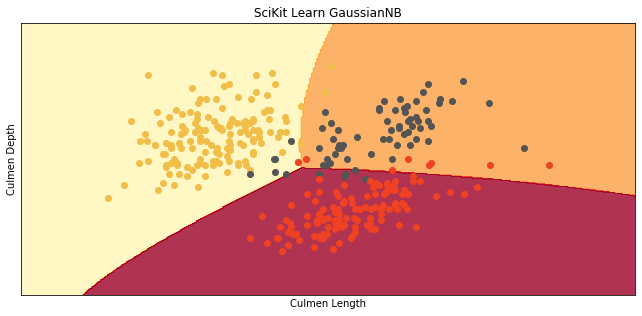

In [36]:
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

plt.figure(figsize=(11, 5))

predictions = model.predict(np.c_[xx.ravel(), yy.ravel()])

predictions = predictions.reshape(xx.shape)
plt.contourf(xx, yy, predictions, cmap='YlOrRd', alpha=0.8)

plt.title("SciKit Learn GaussianNB")
plt.xlabel('Culmen Length')
plt.ylabel('Culmen Depth')

plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color=ORANGE, label='Adelie')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color=GRAY, label='Chinstrap')
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], color=RED, label='Gentoo')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()